In [1]:
from sqlalchemy import create_engine,text
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
db_user = ""
db_password = ""
db_host = "" 
db_port = ""  
db_name = ""

In [3]:
connection = f"postgresql://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}"
engine = create_engine(connection)

In [4]:
query= text(r"SELECT DATE(datefrom) AS date, (regexp_split_to_array(layerid, '\|'))[2]  AS PRO_FROM, (regexp_split_to_array(toid, '\|'))[2]  AS PRO_TO, SUM(datavalue) AS datavalue, SUM(Ni) AS ni, SUM(Ns) AS ns, SUM(Tb) AS tb, SUM(Tc) AS tc, SUM(Gm) AS gm, SUM(Gf) AS gf, SUM(F1) AS f1, SUM(F2) AS f2, SUM(F3) AS f3, SUM(F4) AS f4, SUM(F5) AS f5, SUM(F6) AS f6  FROM movements  GROUP BY date, PRO_FROM, PRO_TO  ORDER BY date;")
try:
    with engine.connect() as connection:
        chunks = pd.read_sql(query, connection, chunksize=1000) 
        df = pd.concat(chunks, ignore_index=True) 
    print(df)
except Exception as e:
    print(f"Errore durante l'esecuzione della query: {e}")

            date pro_from pro_to  datavalue      ni     ns     tb      tc  \
0     2019-08-01      033    033     367422  330751  36671  46058  321364   
1     2019-08-01      033    034      29272   26507   2765   3327   25945   
2     2019-08-01      033    035       4613    4292    321    652    3961   
3     2019-08-01      033    036       3103    2894    209    473    2630   
4     2019-08-01      033    037       5061    4770    291    883    4178   
...          ...      ...    ...        ...     ...    ...    ...     ...   
4936  2019-09-30      099    037       8017    7971     46    386    7631   
4937  2019-09-30      099    038        531     531      0      9     522   
4938  2019-09-30      099    039       7401    7341     60    527    6874   
4939  2019-09-30      099    040      55041   54279    762   5138   49903   
4940  2019-09-30      099    099     487497  474989  12508  56088  431409   

          gm      gf    f1     f2     f3      f4      f5      f6  
0     20

In [5]:
from sklearn.preprocessing import LabelEncoder
df["date"] = pd.to_datetime(df["date"], format="%Y-%m-%d")
label_encoder = LabelEncoder()
df['pro_from'] = label_encoder.fit_transform(df['pro_from'])
df['pro_to'] = label_encoder.fit_transform(df['pro_to'])
df

,date,pro_from,pro_to,datavalue,ni,ns,tb,tc,gm,gf,f1,f2,f3,f4,f5,f6
0,2019-08-01,0,0,367422,330751,36671,46058,321364,204409,163013,2929,37099,40234,79731,85347,122082
1,2019-08-01,0,1,29272,26507,2765,3327,25945,17387,11885,44,2273,2642,7301,7437,9575
2,2019-08-01,0,2,4613,4292,321,652,3961,2835,1778,1,263,288,1269,1275,1517
3,2019-08-01,0,3,3103,2894,209,473,2630,1927,1176,0,167,181,861,868,1026
4,2019-08-01,0,4,5061,4770,291,883,4178,3154,1907,1,246,255,1439,1444,1676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4936,2019-09-30,8,4,8017,7971,46,386,7631,4971,3046,0,368,372,2302,2306,2669
4937,2019-09-30,8,5,531,531,0,9,522,346,185,0,9,9,168,168,177
4938,2019-09-30,8,6,7401,7341,60,527,6874,4436,2965,4,474,524,2003,1987,2409
4939,2019-09-30,8,7,55041,54279,762,5138,49903,31361,23680,382,5025,5989,13488,13104,17053


Statistiche descrittive sul DataFrame 

In [7]:
df_describe=df.describe()
df_describe

,date,pro_from,pro_to,datavalue,ni,ns,tb,tc,gm,gf,f1,f2,f3,f4,f5,f6
count,4941,4941.00000,4941.00000,4.941000e+03,4.941000e+03,4941.000000,4941.000000,4.941000e+03,4941.000000,4941.000000,4941.000000,4941.000000,4941.000000,4941.000000,4941.000000,4941.000000
mean,2019-08-31 00:00:00,4.00000,4.00000,7.017681e+04,6.639403e+04,3782.780004,7886.250961,6.229056e+04,39280.786480,30896.025703,704.762599,7292.046752,7645.318964,15401.575390,15878.217365,23254.891115
min,2019-08-01 00:00:00,0.00000,0.00000,5.400000e+01,5.400000e+01,0.000000,0.000000,5.400000e+01,36.000000,18.000000,0.000000,0.000000,0.000000,17.000000,18.000000,18.000000
25%,2019-08-16 00:00:00,2.00000,2.00000,8.650000e+02,8.430000e+02,6.000000,42.000000,8.100000e+02,548.000000,315.000000,0.000000,24.000000,24.000000,261.000000,261.000000,288.000000
50%,2019-08-31 00:00:00,4.00000,4.00000,3.984000e+03,3.768000e+03,79.000000,269.000000,3.533000e+03,2459.000000,1474.000000,0.000000,168.000000,164.000000,1130.000000,1146.000000,1319.000000
75%,2019-09-15 00:00:00,6.00000,6.00000,4.337100e+04,4.136600e+04,988.000000,3626.000000,3.909500e+04,25348.000000,17871.000000,164.000000,3414.000000,3786.000000,10452.000000,10713.000000,14457.000000
max,2019-09-30 00:00:00,8.00000,8.00000,1.457255e+06,1.390940e+06,135162.000000,190186.000000,1.267509e+06,798639.000000,658616.000000,13970.000000,190107.000000,160773.000000,285445.000000,312515.000000,497063.000000
std,NaN,2.58225,2.58225,1.801550e+05,1.705241e+05,12103.448744,21900.719899,1.584637e+05,99606.127179,80580.305435,1990.679632,20484.634583,20566.335611,37684.374841,39462.589149,60469.299027


Istogramma con distribuzioni sovrapposte dei valori di 'datavalue', suddivisi in base alla provincia di partenza

<Axes: xlabel='datavalue', ylabel='Count'>

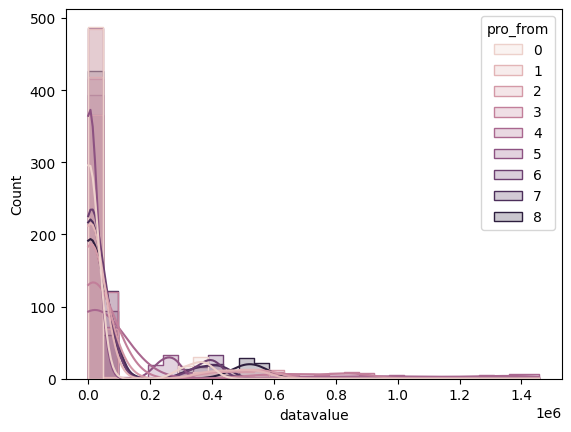

In [9]:
sns.histplot(data=df, x="datavalue", hue="pro_from", bins = 30, element="step",kde=True)

 kde include una curva di densità per ogni provincia, sovrapposta all'istogramma per rendere più evidente la forma della distribuzione.
 La maggior parte dei valori di 'datavalue' è concentrata vicino a zero.
 Ci sono pochi valori molto grandi di 'datavalue' (oltre 1.4 milioni).
 La distribuzione complessiva di 'datavalue' è asimmetrica, con una forte concentrazione di valori piccoli.
 La suddivisione per 'pro_from' non evidenzia differenze significative tra i gruppi.

Istogramma con distribuzioni sovrapposte dei valori di 'datavalue', suddivisi in base alla provincia di arrivo

<Axes: xlabel='datavalue', ylabel='Count'>

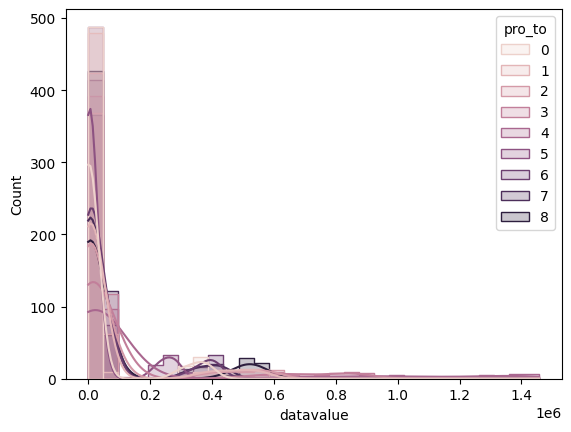

In [12]:
sns.histplot(data=df, x="datavalue", hue="pro_to", bins = 30, element="step",kde=True)

La maggior parte dei valori di 'datavalue' è concentrata vicino a zero.
Ci sono pochi valori molto grandi di 'datavalue' (oltre 1.4 milioni).
La distribuzione complessiva di 'datavalue' è asimmetrica, con una forte concentrazione di valori piccoli.
La suddivisione per 'pro_to' non evidenzia differenze significative tra i gruppi.

Istogramma con distribuzioni sovrapposte dei valori di 'ni' e 'ns', suddivisi in base alla provincia di partenza

<Axes: xlabel='ni', ylabel='Count'>

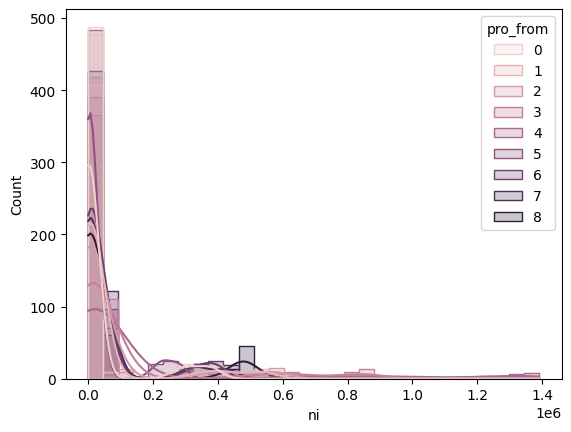

In [15]:
sns.histplot(data=df, x="ni", hue="pro_from", bins = 30, element="step",kde=True)

<Axes: xlabel='ns', ylabel='Count'>

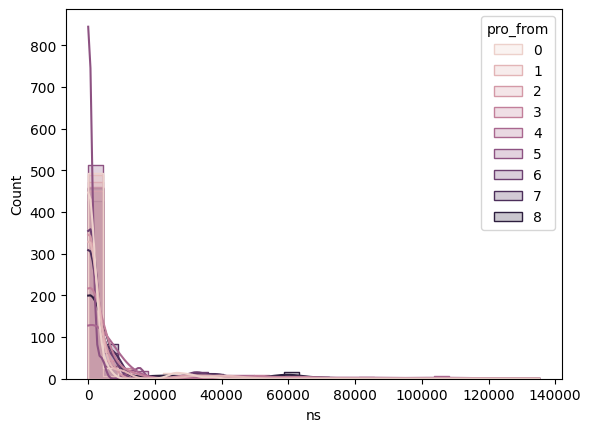

In [16]:
sns.histplot(data=df, x="ns", hue="pro_from", bins = 30, element="step",kde=True)

Dagli ultimi due grafici si deduce che, tra le province, il numero di italiani che si sposta è superiore a quello degli stranieri. Questo dato è coerente con le nostre aspettative, considerando che ci troviamo in Italia.

In [22]:
df1 = df.groupby('date', as_index=False)[['tb', 'tc', 'datavalue', 'ni', 'ns']].sum()
df1

,date,tb,tc,datavalue,ni,ns
0,2019-08-01,783350,5413131,6196481,5570218,626263
1,2019-08-02,739268,5241620,5980888,5371692,609196
2,2019-08-03,592975,4975654,5568629,5007711,560918
3,2019-08-04,458541,4240394,4698935,4249696,449239
4,2019-08-05,656891,4964421,5621312,5082237,539075
...,...,...,...,...,...,...
56,2019-09-26,807295,5881567,6688862,6549595,139267
57,2019-09-27,783384,5773319,6556703,6427776,128927
58,2019-09-28,679751,5659880,6339631,6214378,125253
59,2019-09-29,535205,4845703,5380908,5289784,91124


Plot spostamenti nel tempo

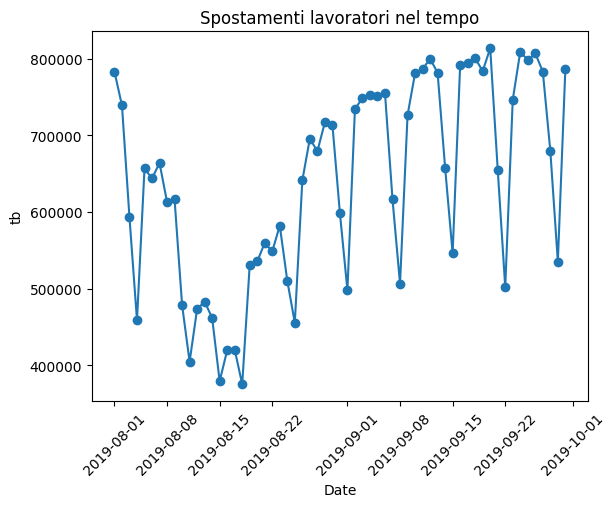

In [25]:
plt.plot(df1["date"], df1["tb"], linestyle="-", marker="o") 
plt.xlabel("Date")
plt.ylabel("tb")
plt.title("Spostamenti lavoratori nel tempo")
plt.xticks(rotation=45)
plt.show()

È possibile osservare periodi con valori medi di 'tb' più bassi, come ad agosto, e periodi con valori medi di 'tb' più alti, come a settembre. Questo risulta coerente con le nostre aspettative, poiché durante la settimana di Ferragosto, i viaggi per motivi lavorativi subiscono una netta diminuzione, mentre a settembre le persone tornano a spostarsi per lavoro.

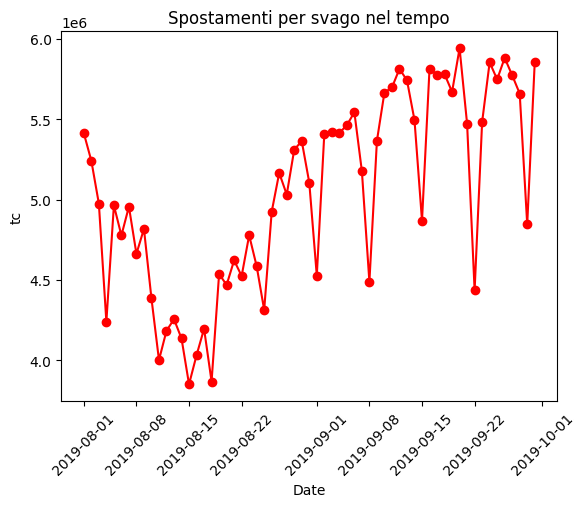

In [28]:
plt.plot(df1["date"], df1["tc"], linestyle="-", marker="o", color='red') 
plt.xlabel("Date")
plt.ylabel("tc")
plt.title("Spostamenti per svago nel tempo")
plt.xticks(rotation=45)
plt.show()

Si osservano periodi con valori medi di 'tc' più bassi, come ad agosto, e periodi con valori medi di 'tc' più alti, come a settembre. Questo è coerente con le nostre aspettative: nelle prime settimane di agosto, infatti, le persone si spostano per andare in vacanza, e durante la settimana di Ferragosto, molte sono già in ferie e restano nelle loro destinazioni, riducendo ulteriormente i loro spostamenti. A partire da settembre, invece, più persone riprendono a spostarsi.

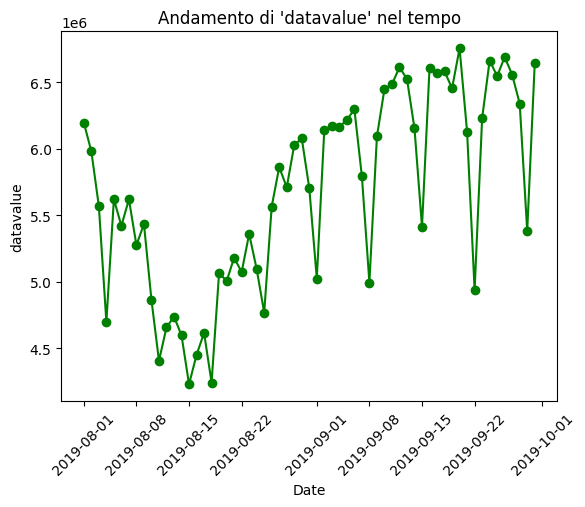

In [31]:
plt.plot(df1["date"], df1["datavalue"], linestyle="-", marker="o", color='green')
plt.xlabel("Date")
plt.ylabel("datavalue")
plt.title("Andamento di 'datavalue' nel tempo")
plt.xticks(rotation=45)
plt.show()

Nel mese di agosto, le persone tendono inizialmente a spostarsi per raggiungere la loro destinazione di vacanza, per poi rimanere nel luogo scelto per le ferie, soprattutto durante la settimana di Ferragosto. A partire da settembre, invece, si osserva un incremento degli spostamenti: non solo per coloro che rientrano a casa dopo le vacanze, ma anche per chi riprende l'attività lavorativa, con un conseguente aumento dei viaggi.

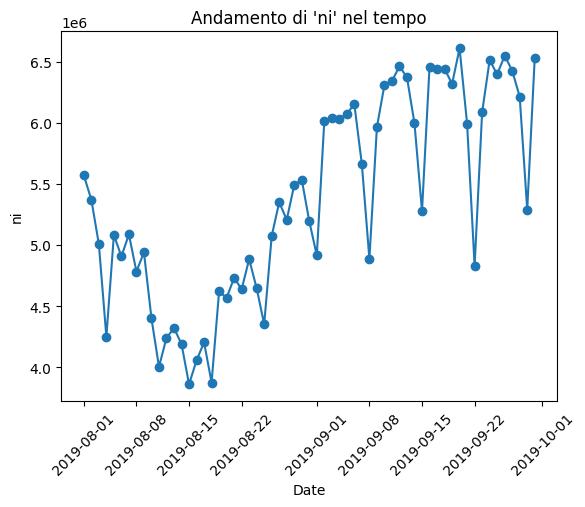

In [34]:
plt.plot(df1["date"], df1["ni"], linestyle="-", marker="o") 
plt.xlabel("Date")
plt.ylabel("ni")
plt.title("Andamento di 'ni' nel tempo")
plt.xticks(rotation=45)
plt.show()

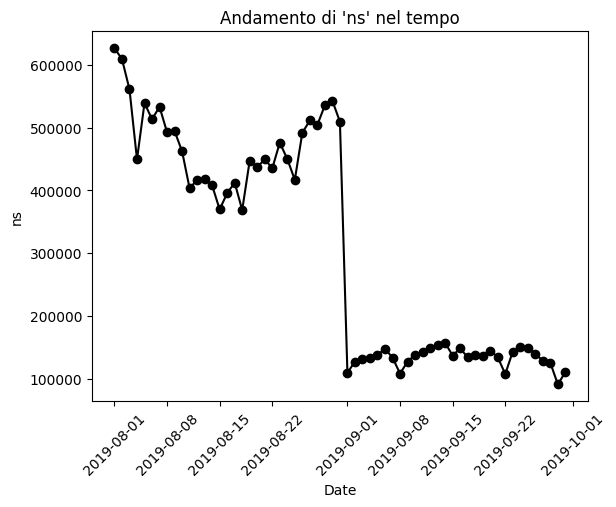

In [35]:
plt.plot(df1["date"], df1["ns"], linestyle="-", marker="o", color = 'black') 
plt.xlabel("Date")
plt.ylabel("ns")
plt.title("Andamento di 'ns' nel tempo")
plt.xticks(rotation=45)
plt.show()

Dal grafico si evince che, nel mese di agosto, molti stranieri sono in viaggio in Italia, ma a partire da inizio settembre tornano a casa, causando una diminuzione drastica del numero di visitatori esteri.

Boxplot

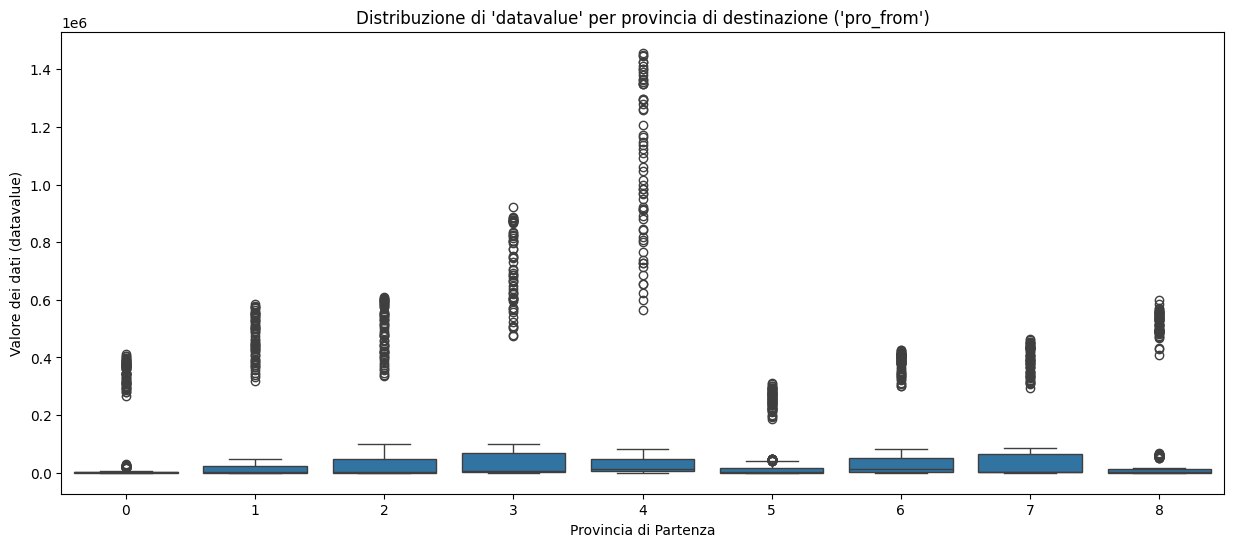

In [40]:
plt.figure(figsize=(15, 6))  
sns.boxplot(data=df, x="pro_from", y="datavalue", showfliers=True) 
plt.title("Distribuzione di 'datavalue' per provincia di destinazione ('pro_from')")
plt.xlabel("Provincia di Partenza")
plt.ylabel("Valore dei dati (datavalue)")
plt.show()

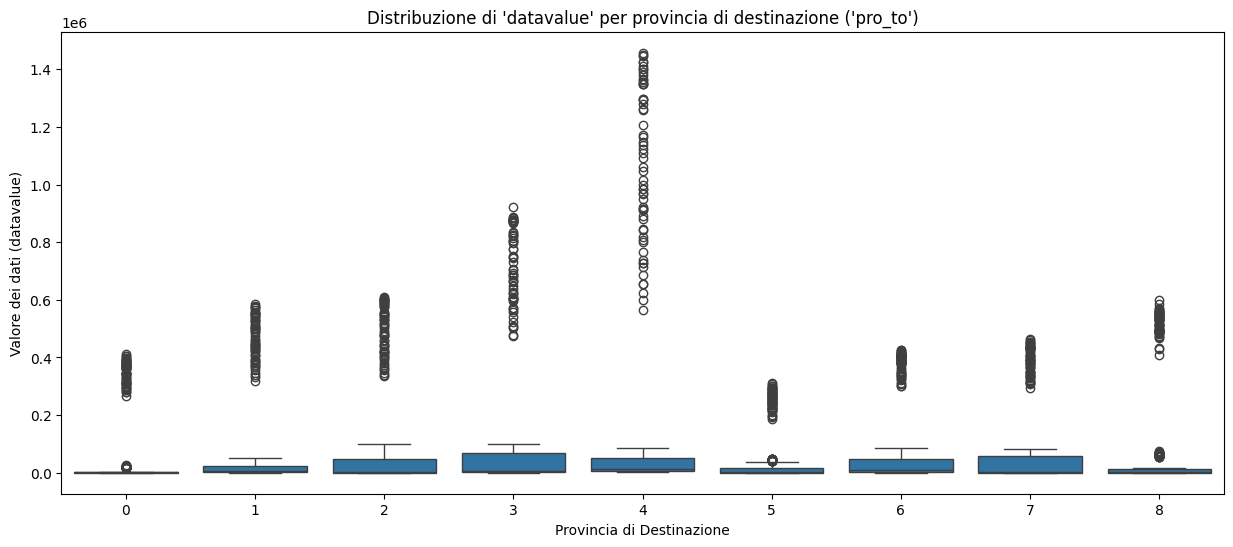

In [41]:
plt.figure(figsize=(15, 6))  
sns.boxplot(data=df, x="pro_to", y="datavalue", showfliers=True) 
plt.title("Distribuzione di 'datavalue' per provincia di destinazione ('pro_to')")
plt.xlabel("Provincia di Destinazione")
plt.ylabel("Valore dei dati (datavalue)")
plt.show()

OUTLIERS: Non abbiamo rimosso gli outliers perché i mesi di agosto e settembre sono periodi particolari dell'anno, caratterizzati dalle vacanze estive. In questi mesi, i flussi di spostamento possono variare in modo significativo. Pertanto, non ci sembrava giustificato eliminare i valori molto alti, poiché non si trattano di outliers causati da errori. In questi mesi, infatti, ci sono giorni in cui poche persone si spostano tra le province, magari perché sono già in ferie, e altri in cui si registra un numero molto alto di spostamenti, quando molte persone tornano dalle vacanze.

Griglia di istogrammi che mostrano la distribuzione di 'f1' in base alle diverse combinazioni di province di partenza e di destinazione

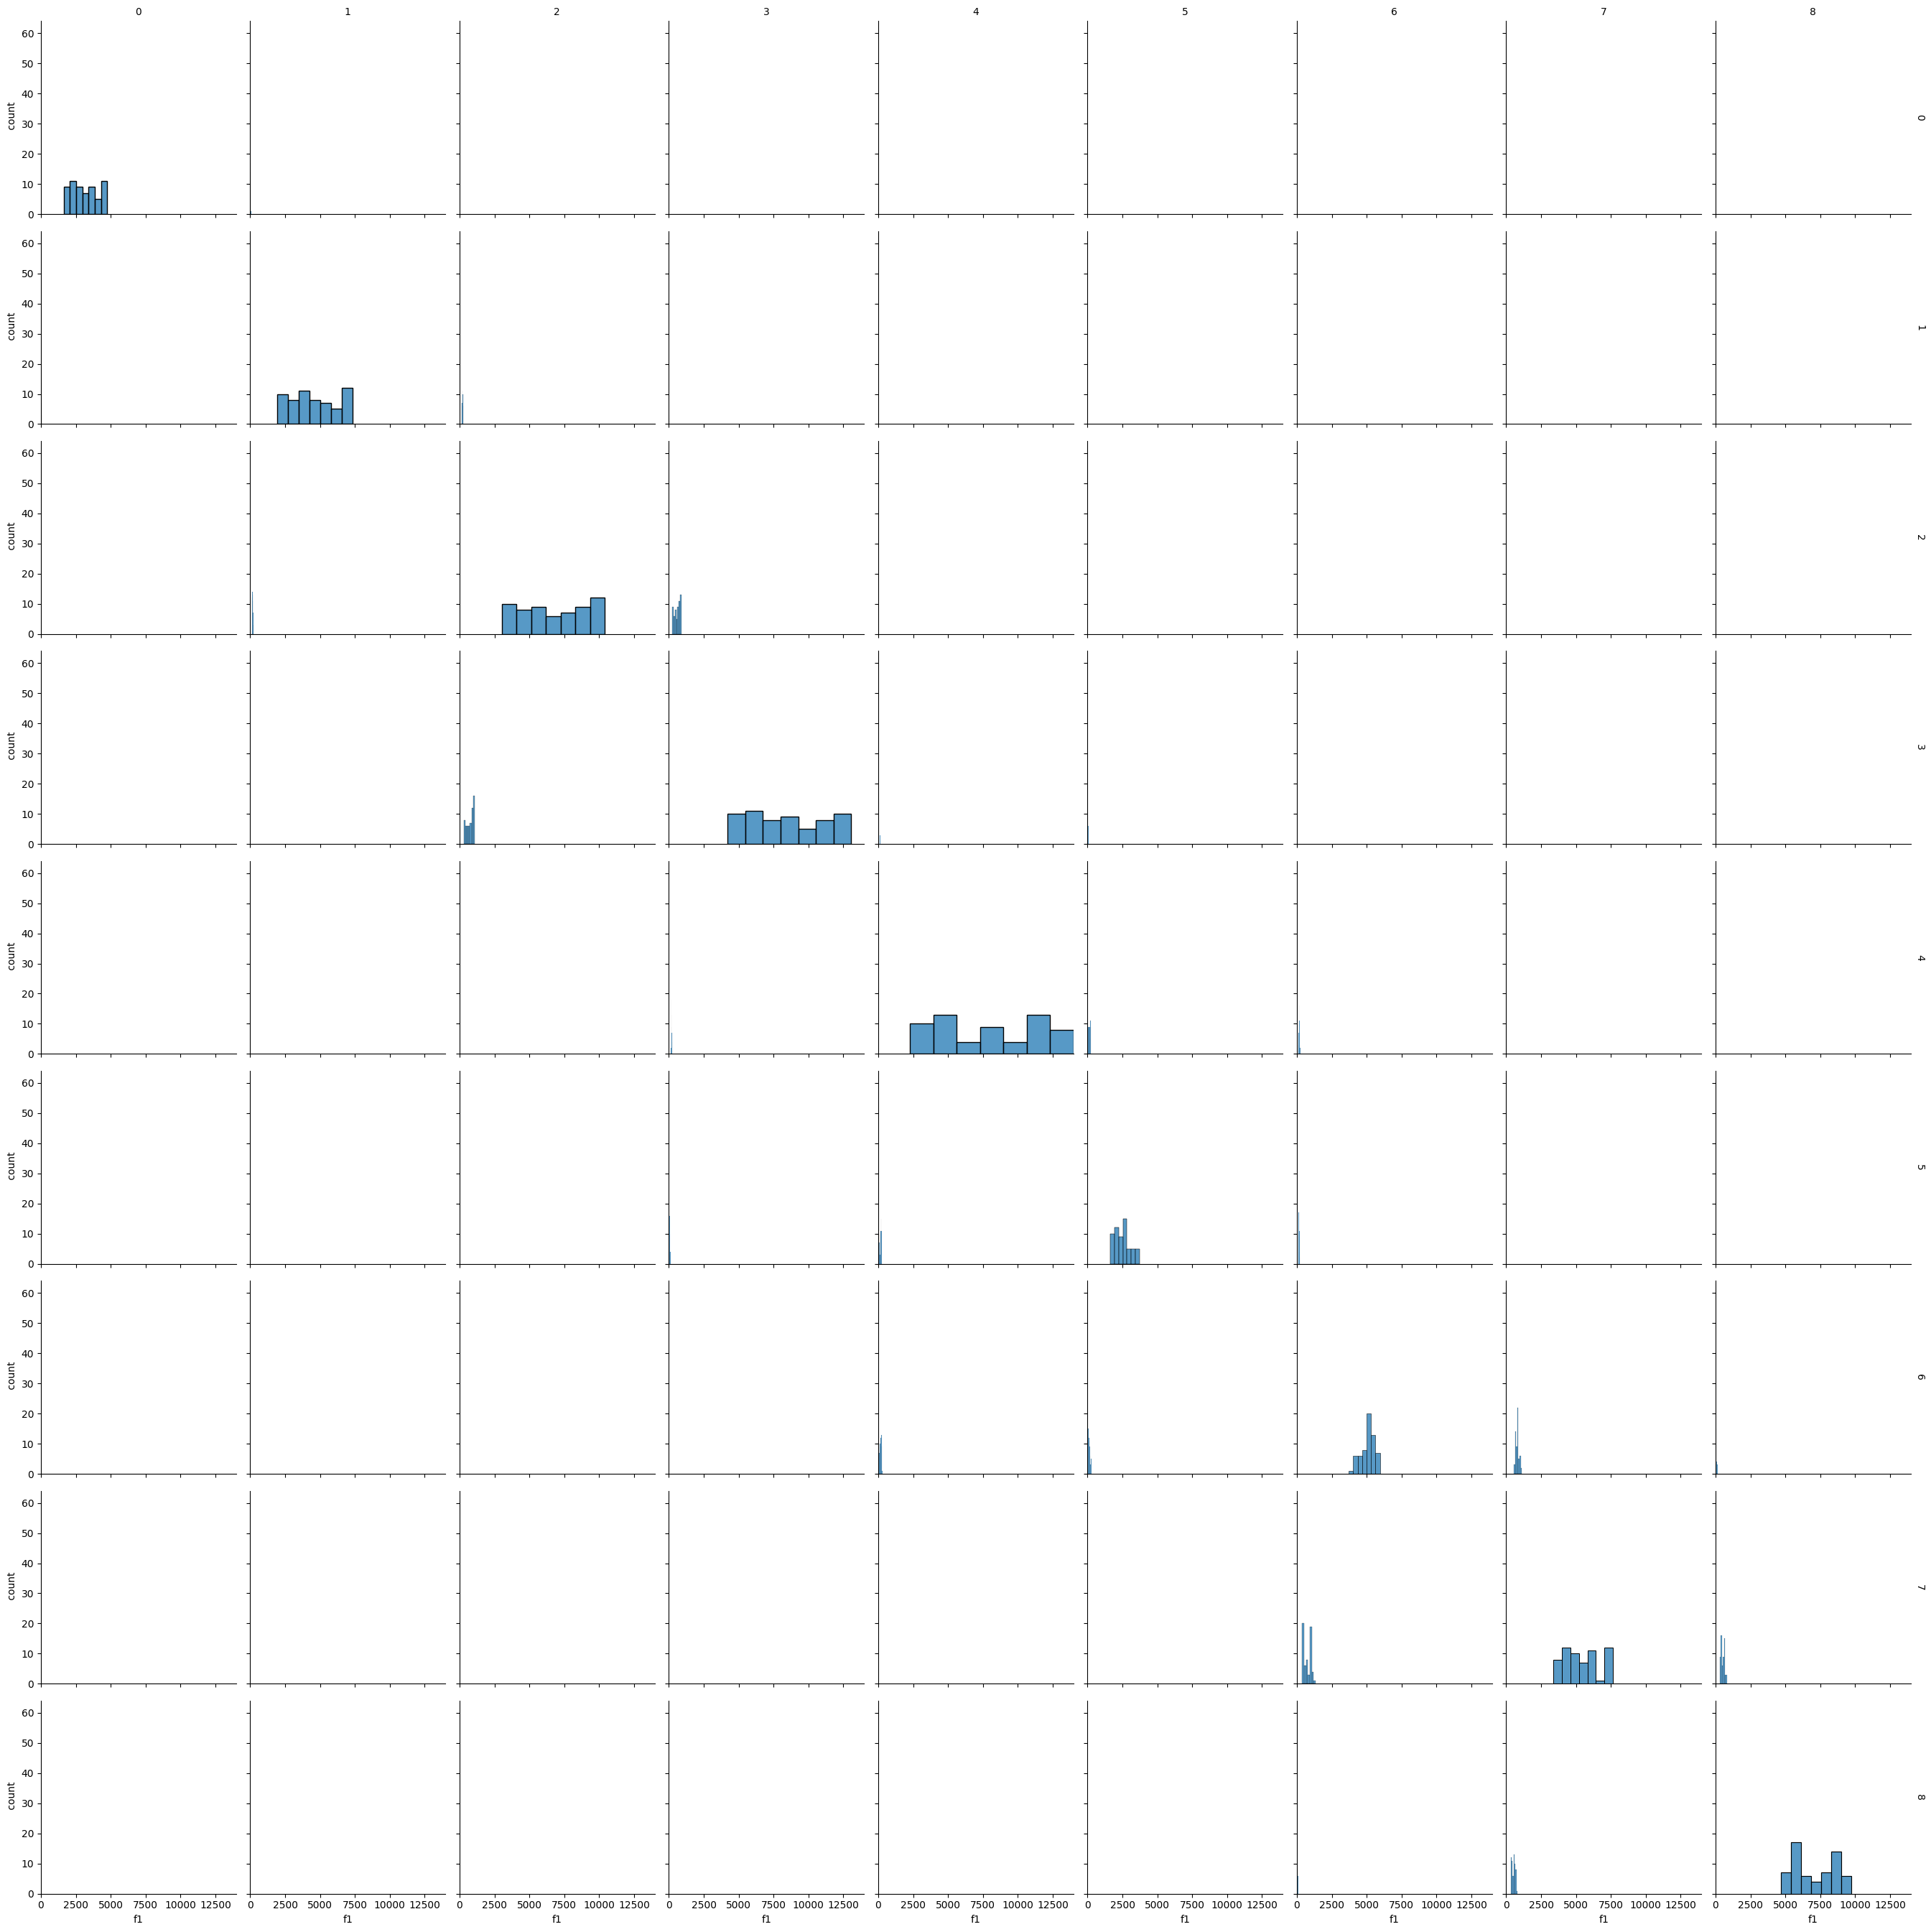

In [46]:
g = sns.FacetGrid(df, col="pro_from", row="pro_to", margin_titles=True)
g.map_dataframe(sns.histplot, x="f1")
g.set_axis_labels("f1", " count")
g.set(xlim=(df["f1"].min(), df["f1"].max()))
g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.tight_layout()

Dalla griglia 9x9 è possibile analizzare, grazie ai vari histplot, il numero di persone appartenenti alla fascia f1 (con età inferiore ai 18 anni) che si spostano tra le diverse province. Ogni sottogruppo di dati (coppia di province) ha un proprio istogramma, permettendo di confrontare come la distribuzione di "f1" varia tra diverse aree geografiche. I dati evidenziano che gli spostamenti non sono particolarmente elevati, il che potrebbe essere spiegato dal fatto che, essendo ancora minorenni, non sono soggetti a spostamenti frequenti legati a motivi lavorativi.

Griglia di istogrammi che mostrano la distribuzione di 'tb' in base alle diverse combinazioni di province di partenza e di destinazione

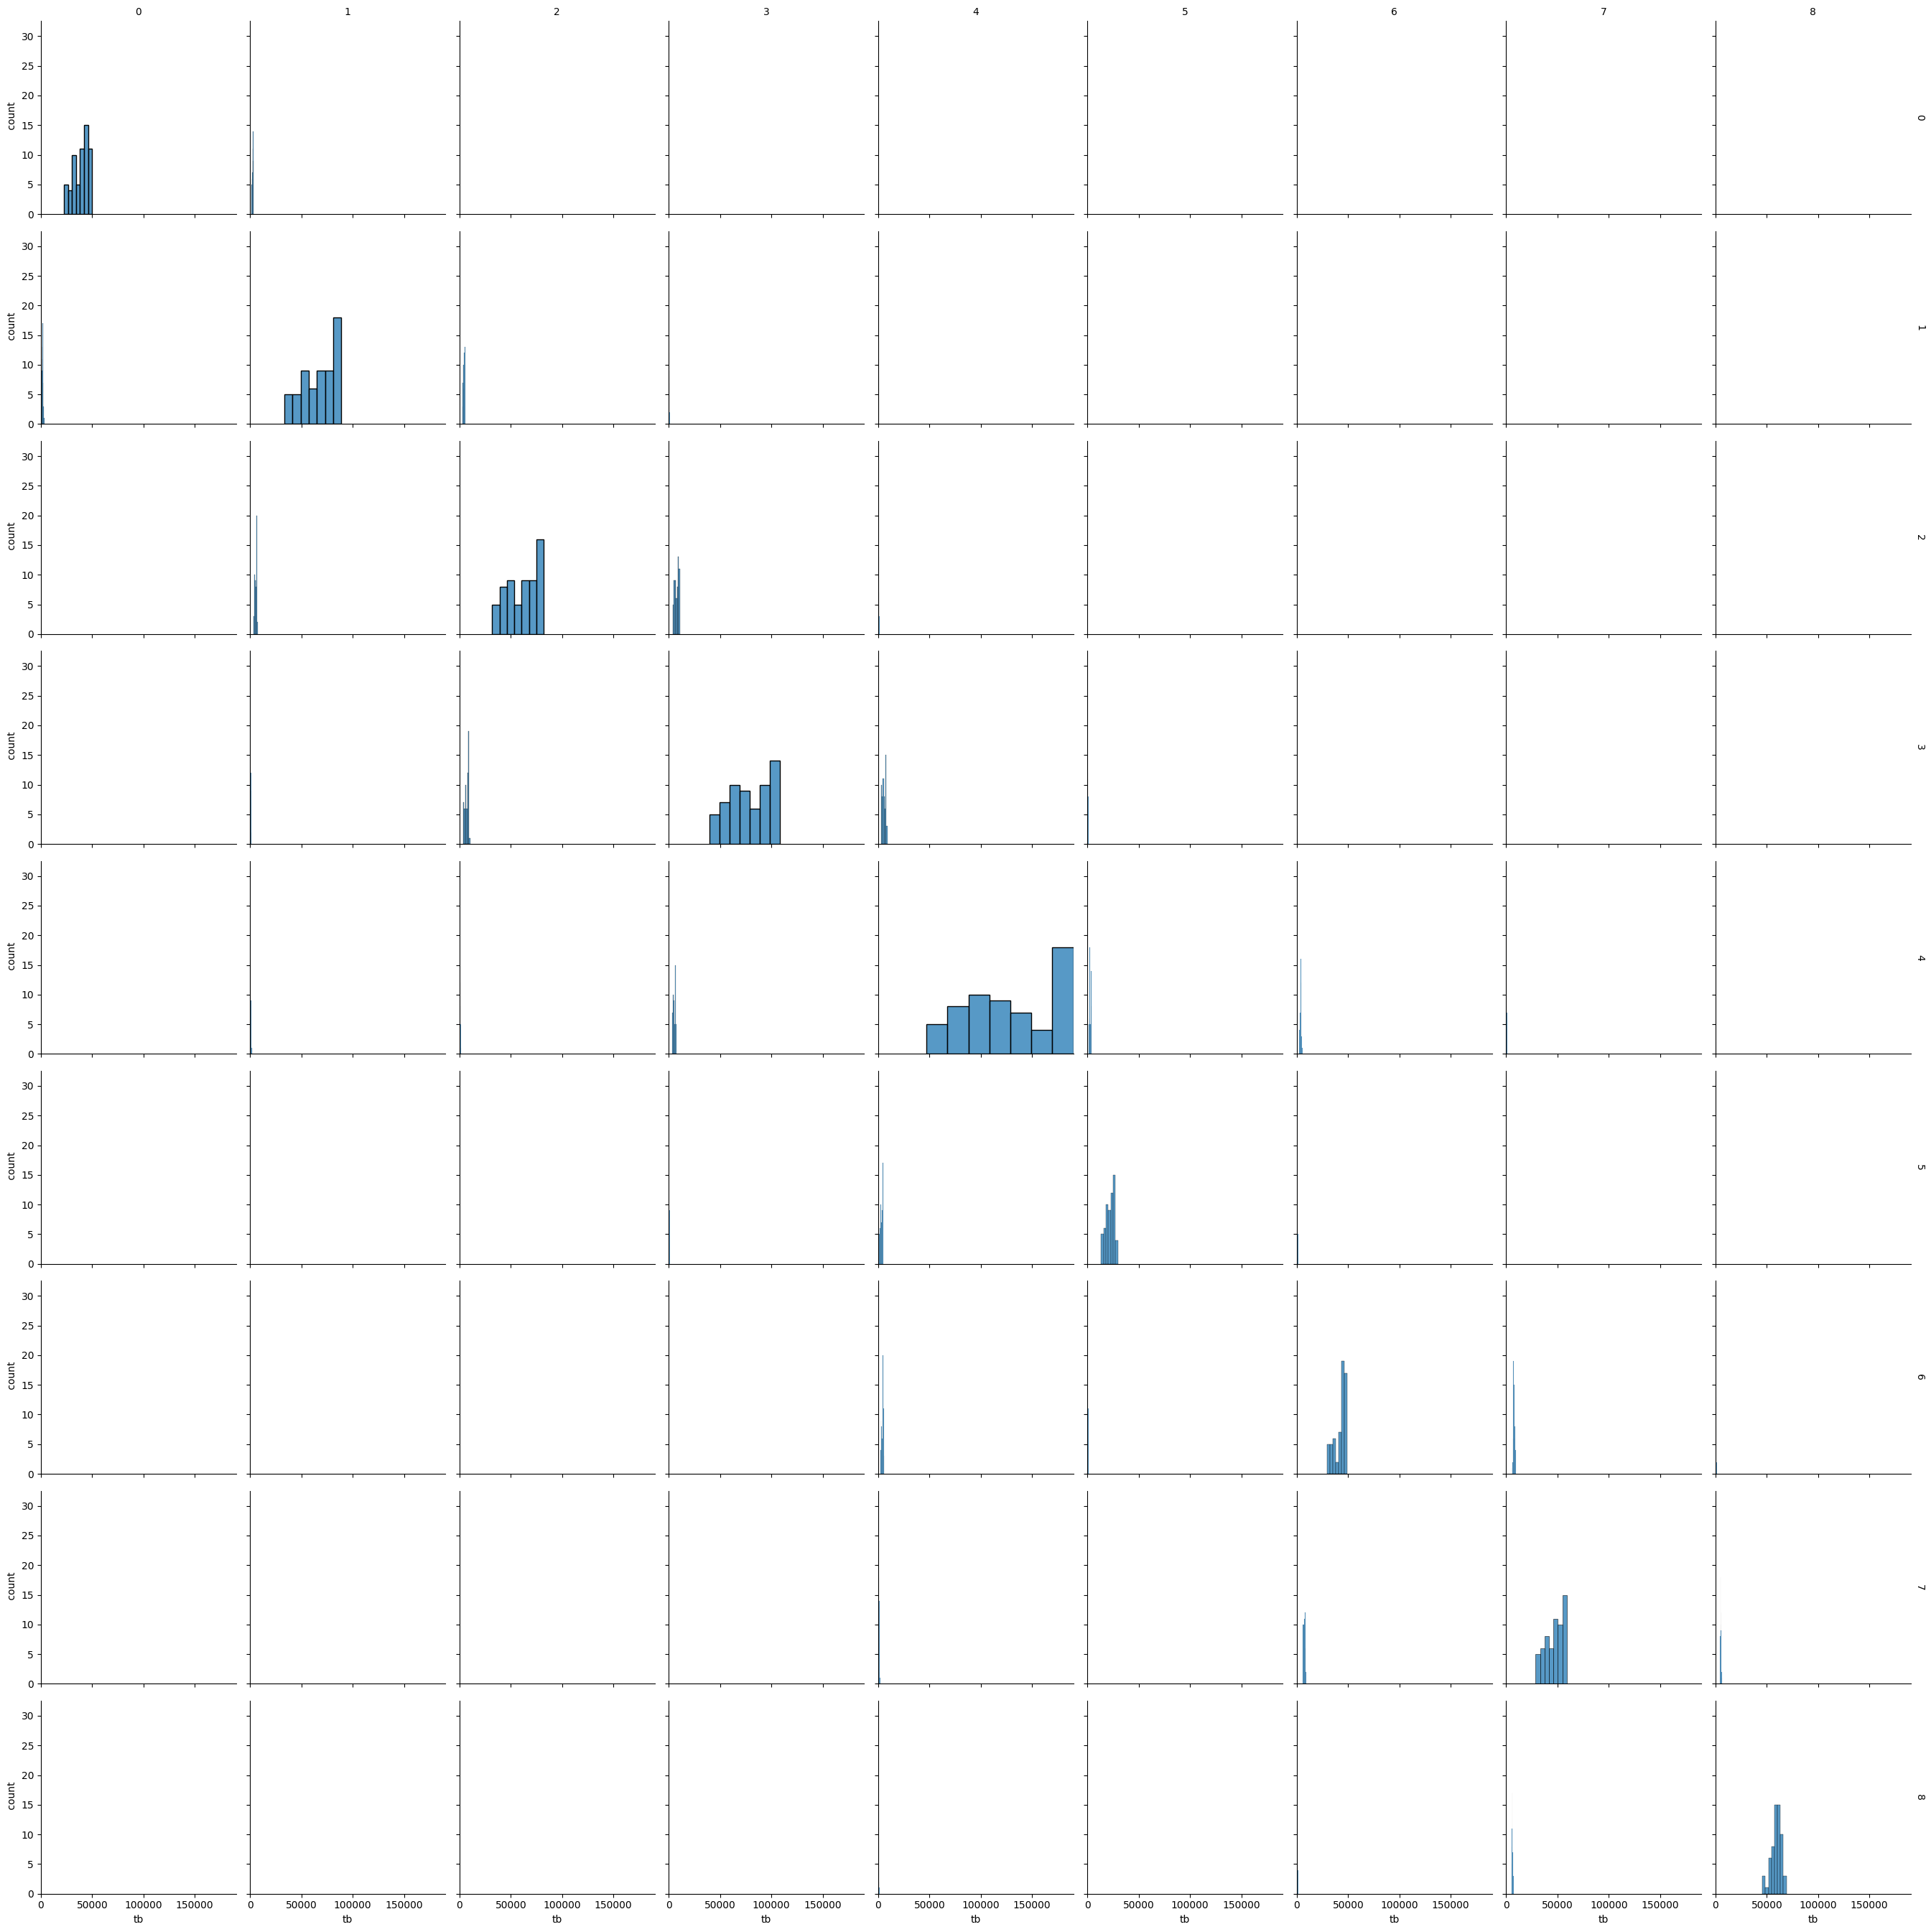

In [50]:
g = sns.FacetGrid(df, col="pro_from", row="pro_to", margin_titles=True)
g.map_dataframe(sns.histplot, x="tb")
g.set_axis_labels("tb", " count")
g.set(xlim=(df["tb"].min(), df["tb"].max()))
g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.tight_layout()

Rispetto alla fascia f1, i lavoratori sembrano tendere maggiormente a spostarsi da una provincia all'altra, indicando una maggiore mobilità in confronto ai minorenni.

Grafici di regressione

'tb'-'f4'

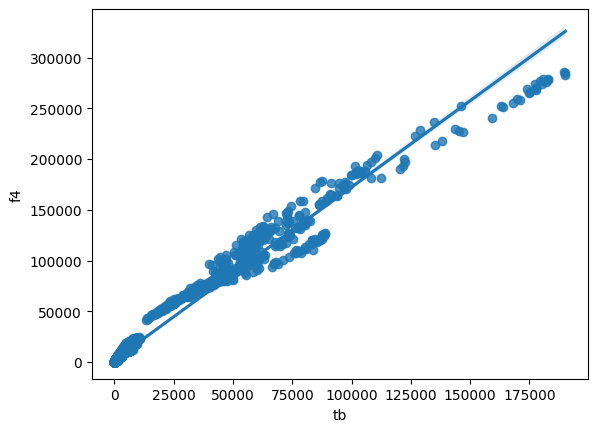

In [55]:
sns.regplot(x="tb", y="f4", data=df);

'tb'-'f5'

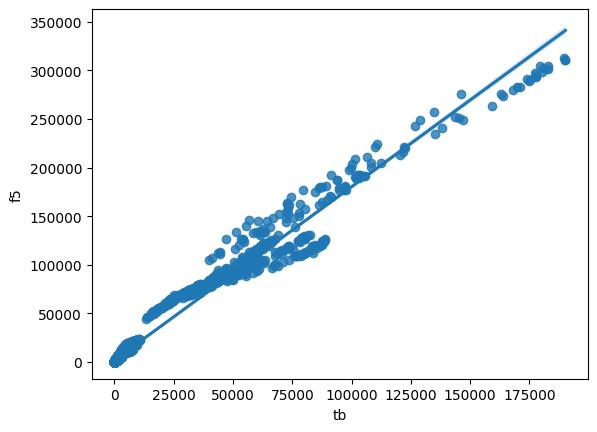

In [58]:
sns.regplot(x="tb", y="f5", data=df);

In [59]:
from scipy import stats
stats.pearsonr(df['tb'], df['f4'])

PearsonRResult(statistic=0.9900016094867669, pvalue=0.0)

In [60]:
stats.pearsonr(df['tb'], df['f5'])

PearsonRResult(statistic=0.9899165721845891, pvalue=0.0)

La forte correlazione di Pearson indica una relazione lineare molto forte tra le variabili 'tb' e 'f5'. Inoltre, con un p-value inferiore a 0.05 possiamo concludere che la correlazione osservata è significativa. Questo risultato era atteso, poiché è ragionevole ipotizzare che i lavoratori appartengano principalmente alla fascia F4, F5.

'tc'-'f2'

<Axes: xlabel='tc', ylabel='f2'>

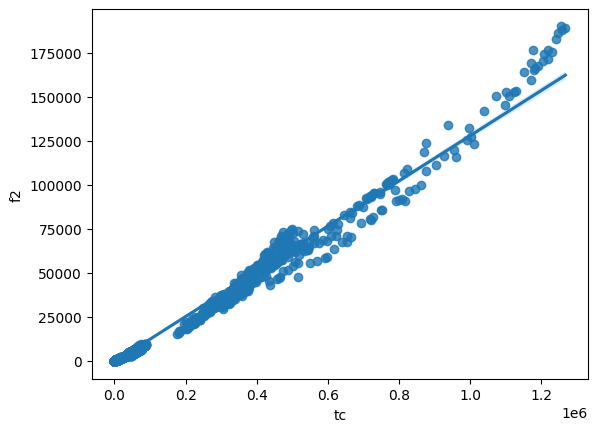

In [66]:
sns.regplot(x="tc", y="f2", data=df)

In [67]:
stats.pearsonr(df['tc'], df['f2'])

PearsonRResult(statistic=0.9938648867376918, pvalue=0.0)

'tb'-'ns'

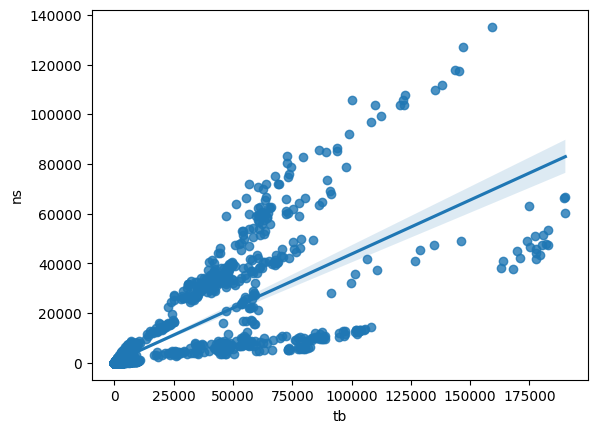

In [71]:
sns.regplot(x="tb", y="ns", data=df);

In [72]:
stats.pearsonr(df['tb'], df['ns'])

PearsonRResult(statistic=0.7861031101112814, pvalue=0.0)

Esiste una correlazione positiva tra il numero di lavoratori e gli stranieri che si spostano per svago (r = 0.786), sebbene non sia perfettamente forte. Inoltre, il risultato è statisticamente significativo (p < 0.001).

'tc'-'ns'

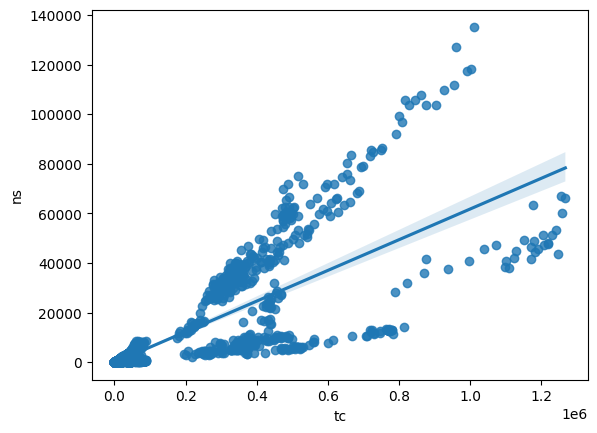

In [77]:
sns.regplot(x="tc", y="ns", data=df);

In [78]:
stats.pearsonr(df['tc'], df['ns'])

PearsonRResult(statistic=0.8099982239096739, pvalue=0.0)

Relazioni deboli e negative

In [82]:
stats.pearsonr(df['pro_from'], df['tb'])

PearsonRResult(statistic=-0.01119640243307574, pvalue=0.4313721274364693)

In [84]:
stats.pearsonr(df['pro_from'], df['tc'])

PearsonRResult(statistic=0.0050398816237277105, pvalue=0.7232060748424437)

In [86]:
stats.pearsonr(df['pro_to'], df['tb'])

PearsonRResult(statistic=-0.009509314438486323, pvalue=0.5039567502719163)

In [88]:
stats.pearsonr(df['pro_from'], df['tc'])

PearsonRResult(statistic=0.0050398816237277105, pvalue=0.7232060748424437)

Il valore del coefficiente di correlazione di Pearson (statistic) è molto vicino a 0 e anche negativo. Questo indica che c'è una correlazione estremamente debole e negativa tra le due variabili. Ci aspettavamo che non ci fosse correlazione tra le provincie e 'tb','tc' perchè il numero delle provincie non è un valore quantitativo ma qualitativo(è un numero identificativo).

Matrice di correlazione per tutte le colonne numeriche in df

In [92]:
cormat = df.corr()
round(cormat,2)

,date,pro_from,pro_to,datavalue,ni,ns,tb,tc,gm,gf,f1,f2,f3,f4,f5,f6
date,1.00,0.00,-0.00,0.03,0.05,-0.15,0.04,0.03,0.03,0.03,0.06,0.05,0.04,0.03,0.03,0.03
pro_from,0.00,1.00,-0.00,0.00,0.00,0.04,-0.01,0.01,-0.00,0.01,0.03,0.01,0.01,0.01,0.00,-0.00
pro_to,-0.00,-0.00,1.00,0.00,0.00,0.04,-0.01,0.00,-0.00,0.01,0.03,0.01,0.01,0.01,0.00,-0.00
datavalue,0.03,0.00,0.00,1.00,1.00,0.81,0.99,1.00,1.00,1.00,0.95,0.99,1.00,1.00,1.00,1.00
ni,0.05,0.00,0.00,1.00,1.00,0.78,0.99,1.00,1.00,1.00,0.95,1.00,1.00,1.00,1.00,1.00
ns,-0.15,0.04,0.04,0.81,0.78,1.00,0.79,0.81,0.81,0.81,0.71,0.78,0.80,0.80,0.81,0.82
tb,0.04,-0.01,-0.01,0.99,0.99,0.79,1.00,0.99,0.99,0.99,0.95,0.99,0.99,0.99,0.99,0.99
tc,0.03,0.01,0.00,1.00,1.00,0.81,0.99,1.00,1.00,1.00,0.95,0.99,1.00,1.00,1.00,1.00
gm,0.03,-0.00,-0.00,1.00,1.00,0.81,0.99,1.00,1.00,1.00,0.95,0.99,1.00,1.00,1.00,1.00
gf,0.03,0.01,0.01,1.00,1.00,0.81,0.99,1.00,1.00,1.00,0.95,1.00,1.00,1.00,1.00,1.00


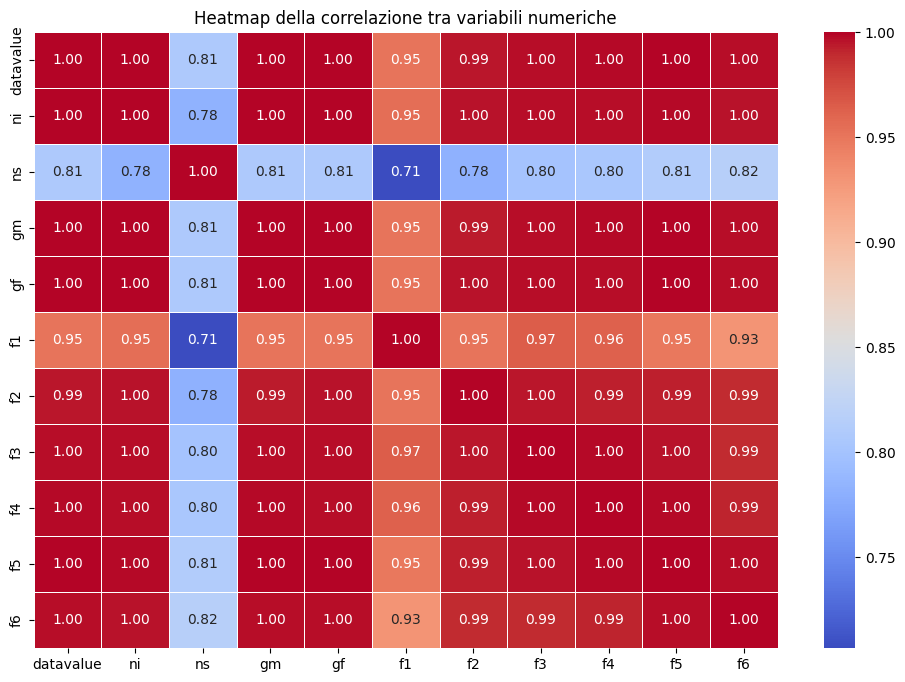

In [94]:
corr_matrix = df[['datavalue', 'ni', 'ns', 'gm', 'gf', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6']].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap della correlazione tra variabili numeriche')
plt.show()

Osservando la matrice, notiamo che le variabili 'pro_from' e 'pro_to', che rappresentano rispettivamente la provincia di partenza e quella di destinazione, non mostrano alcuna correlazione significativa con le altre variabili, suggerendo che la provenienza e la destinazione degli spostamenti non incidono direttamente sui valori registrati nelle altre colonne.
Al contrario, 'datavalue' presenta una fortissima correlazione (quasi 1.00) con molte variabili(ni, tc, gm, gf, f1, f2, f3,f4,f5,f6). 
Ce lo aspettavamo perchè datavalue è calcolato come somma di: gm e gf, ni e ns, tb e tc, e dalla somma delle età delle persone che compiono un determinato spostamento. Di conseguenza, l'elevata correlazione riflette la struttura stessa dei dati.